# Read Library for Data Modelling (Random Forest)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

data_path = ['data']
traindir = ['train']
testdir = ['test']

## For Modified Dataset with Preprocessing

In [2]:
trainpath = os.sep.join(data_path + traindir + ['Train_Modified.csv'])

traindf = pd.read_csv(trainpath, sep = ",")
traindf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.6,0.25,0.30,14.40,0.052,40.0,183.0,0.99800,3.02,0.50,9.1,Poor
1,7.8,0.26,0.49,3.20,0.027,28.0,87.0,0.99190,3.03,0.32,11.3,Good
2,6.3,0.23,0.33,1.50,0.036,15.0,105.0,0.99100,3.32,0.42,11.2,Poor
3,6.0,0.26,0.18,7.00,0.055,50.0,194.0,0.99591,3.21,0.43,9.0,Poor
4,7.9,0.37,0.31,2.85,0.037,5.0,24.0,0.99110,3.19,0.36,11.9,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...
3423,6.2,0.21,0.52,6.50,0.047,28.0,123.0,0.99418,3.22,0.49,9.9,Poor
3424,7.0,0.14,0.32,9.00,0.039,54.0,141.0,0.99560,3.22,0.43,9.4,Poor
3425,7.6,0.27,0.52,3.20,0.043,28.0,152.0,0.99129,3.02,0.53,11.4,Poor
3426,6.3,0.24,0.29,13.70,0.035,53.0,134.0,0.99567,3.17,0.38,10.6,Poor


In [3]:
testpath = os.sep.join(data_path + testdir + ['Test_Modified.csv'])

testdf = pd.read_csv(testpath, sep = ",")
testdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667,Good
1,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000,Good
2,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000,Good
3,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000,Poor
4,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.4,0.29,0.18,15.0,0.040,21.0,116.0,0.99736,3.14,0.50,9.200000,Poor
1466,6.4,0.30,0.33,5.2,0.050,30.0,137.0,0.99304,3.26,0.58,11.100000,Poor
1467,7.0,0.40,0.25,1.8,0.050,51.0,189.0,0.99174,3.00,0.55,11.400000,Poor
1468,6.8,0.36,0.24,4.6,0.039,24.0,124.0,0.99090,3.27,0.34,12.600000,Good


In [4]:
X_train = traindf.drop("quality", axis=1)
X_test = testdf.drop("quality", axis=1)
y_train = traindf["quality"]
y_test = testdf["quality"]

# Try to use Default Parameter

              precision    recall  f1-score   support

        Good     0.8135    0.6231    0.7057       329
        Poor     0.8982    0.9588    0.9275      1141

    accuracy                         0.8837      1470
   macro avg     0.8558    0.7910    0.8166      1470
weighted avg     0.8792    0.8837    0.8779      1470



Text(0.5, 1.0, 'Confusion Matrix')

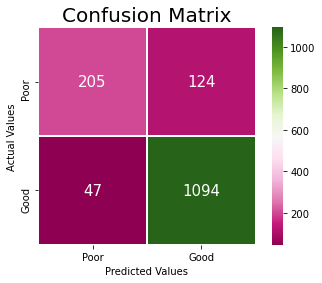

In [5]:
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Poor", "Good"], yticklabels=["Poor", "Good"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)

In [5]:
#Now use GridSearch CV to get the best model

#define the model and parameters
RF = RandomForestClassifier(random_state = 42)

parameters = {'max_features': [5, 'log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 15, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }

model = GridSearchCV(RF, param_grid=parameters)
model = model.fit(X_train,y_train)
model.best_estimator_

RandomForestClassifier(max_depth=15, max_features=5, random_state=42)

              precision    recall  f1-score   support

        Good     0.8270    0.5957    0.6926       329
        Poor     0.8921    0.9641    0.9267      1141

    accuracy                         0.8816      1470
   macro avg     0.8596    0.7799    0.8096      1470
weighted avg     0.8776    0.8816    0.8743      1470



Text(0.5, 1.0, 'Confusion Matrix')

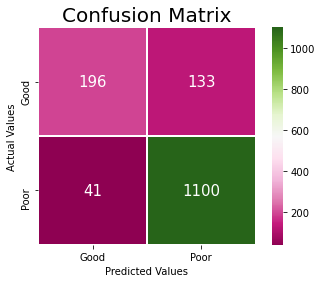

In [7]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, digits = 4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'PiYG', annot_kws={"size": 15}, xticklabels=["Good", "Poor"], yticklabels=["Good", "Poor"]);
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matrix", size = 20)